# linear regression

In [1]:
#we will westimate the best fit line 
#ex:y=mx+c
#we should get minimal error
#error is sum of residuals 

In [2]:
#to determine best fit line we will estimate cost function
#costfucntion=(1/2m)summationn from i=1 to m (y-y^)2
#this error should be minimized
#minimal error best fit line we should take 
  

In [4]:
#gradient descent 
#plot with m on x axis and costfunction on y axis 
#from this we can get where the minimum cost function lies at which m
#we will check global minimum

In [5]:
#convergence theorem
#m=m-(dbyyou have dm)*learning rate(alpha)
#till you get this m zero you have to apply convergence theorem
#that m value is the m  value for best fit lin

In [7]:
#RIDGE AND LASSO REGRESSION
#SUMOFRESIDUALS=COSTFUNCTION=SIGMA(I=1TON)(Y-Y^)2 SHOULD BE ZERO
#DECIDE WHEN TO USE RIDGE AND LASSO REGRESSION

In [8]:
#SOME TIMES LINEARREGRESSION CAUSES OVERFITTING SINCE WE DO ON TRAININGDATASET
#WE CAN USE RIDGE AND LASSO REGRESSION AND PREVENT LASO REGRESSION

In [10]:
#GOOD MODEL SHOULD HAVE LOW BIAS AND LOW VARIANCE
#RIDGE REGRESSION 
#WE WILL CHANGE THE FORMULA FOR COST FUNCTION
#COSTFUNCTION IN RIDGE=SIGMA(Y-Y^)2 + LAMBDA*(SLOPE)2
#WE WILL TRY TO MINIMIZE THIS COSTFUCNTION
#WE ARE PINALIZING THE BESTFIT LINE 
#IF YOU HAVE TWONFEATURES LIKE Y=M1X1+M2X2+C
#THEN SLOPE=SUM OF SQUARES OF SLOPES
#HERE ALSO THERE WILL BE BIAS TO TRAINING DATA SET BUT THIS GIVE 
#A GENERALIZED RESULT FOR TEST DATASET HENCE THIS MODEL IS GOOD
#HERE WE ARE SIMPLY PENALIZING THE HIGHER SLOPE VALUE 
#LAMDA VALUE IS SELECTED USING CROSS VALIDATION


In [12]:
#LASSO REGRESSION
#FOR THE COST FUNCTION INSTEADOF SLOPE SQUARE WE PUT MODULUS SLOPE
#LASSO REGRESSION HELPS TO DO FEATURE SELECTION
#WHERE EVER THE M VALUE IS VERY LOW WE WILL REMOVE THAT FEATURE
#HENCE THIS HELPS TO SELECT FEATURE
#since we are using magnitude of slope the line will become zero but
#in ridge regression line may shrink but will never become zero 
#since there is square to slope

In [13]:
#implementing ridge and lasso regression

In [14]:
from sklearn.datasets import load_boston

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df=load_boston()

In [17]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [19]:
#conver into a dataframe
dataset=pd.DataFrame(df.data)
print(dataset.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [20]:
dataset.columns=df.feature_names

In [21]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
df.target.shape

(506,)

In [23]:
dataset["Prince"]=df.target

In [24]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prince
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
x=dataset.iloc[:,:-1]##independentfeatures
y=dataset.iloc[:,:-1]#dependentfeatures

In [27]:
#linear regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,x,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-9.377386696083567e-26


In [29]:
#ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [30]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-1.0297598075818582e-24


In [32]:
#lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-1.3381973655114857e-07


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [36]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

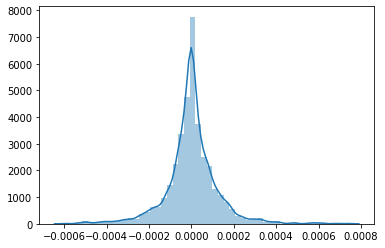

In [37]:
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

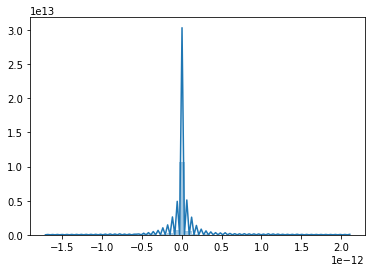

In [38]:
import seaborn as sns

sns.distplot(y_test-prediction_ridge)

In [1]:
#multicollinearity in linear regression 
import pandas as pd


In [2]:
#suppose you have the regression y=b0+b1.x1+b2.x2
#if the vatriable x1 and x2 are also corrlated it(more than 90 percent)
#if independent features are corellated to more than 90%|
#then it causes a problem

In [3]:
#bias and variance 
#underfitting and overfitting 
#underfitting-error high for training dataset
#overfitting-satisfies for training dataset not test dataset
#over-error rate high for testdata
#accuracy for test data and train low-under
#accuracy high for traindata and low for test dataset
#best model gives low bias and low varinace 

In [ ]:
#underfitting-high bias,high vairance
#bias means error of training data
#variance-error of test data
#overfitting-low bias,high variance
#low bias and low vaiance best fitted model


In [4]:
#multiple linear regression
#the regression equation has more than one features 
#mltiple indepemdce features can also effect the price 
#y=b0+b1*x1+b2*x2+b3*x3
#b1 and b2 and b3 will tell how much change in x1,x2,x3 will
#effect y

In [5]:
#importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/sridhar/Downloads/21716_27925_bundle_archive/50_Startups.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]

In [12]:
#Convert the column into categorical columns

states=pd.get_dummies(X['State'],drop_first=True)

In [13]:
# Drop the state coulmn
X=X.drop('State',axis=1)

# concat the dummy variables
X=pd.concat([X,states],axis=1)


In [15]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [20]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
#rsquare concept to check how much matching is there 
#rsquare=1-ssres/ssmean
#if model is good ssres will be greater than ssres
#check formulas for ssres and ssmean 

In [ ]:
#if rsquare value is more neareeer to 1 it is a good model


In [21]:
score

0.9347068473282423

In [22]:
#here it is nearer to 1 so our prediction is a good ione 

In [23]:
## r swuare and adjusted r square 
#r2=1-ssres/sstot
#r2=ssreg/sstot
#ssres=sum of residuals 
#sstot=sum of avergae total
#ssreg=
#limits of r2 are 0 and 1 
#the more nearer to one thenbest fit the line is 
#if the line is average  best fit line then r2 value will
#be less than 0
#it will be less than zero when our model is very bad
#r2 value is used to check good ness of best fit line


In [24]:
#adjusted r2 
#some independent features may not correlate with the target output
#adjusted r2=1- (1-r^2)(N-1)/N-p-1
#r2=sample r square
#p=number of prdictors
#n=total sample size
